# Basics of installing PyTorch (CUDA) in Anaconda
- Open Anaconda Powershell Prompt
- Create new virtual environment: `conda create -n py312 python=3.12`
- Activate it: `conda activate py312`
- Install PyTorch using CONDA: `conda install pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia`
- Verify PyTorch installation: `python -c "import torch; print(torch.__version__)"`
- Verify CUDA availability: `python -c "import torch; print(torch.cuda.is_available())"`
### Alternative PyTorch
- Install PyTorch for CPU: `conda install pytorch torchvision torchaudio cpuonly -c pytorch`

## Tips to redirect your Jupyter Notebook kernel to the new environment
Activate your virtual environment first on Anaconda Powershell Prompt
- #### Install ipykernel
`conda install ipykernel`

- #### Add the environment to Jupyter (e.g. if your virtual environment name is py312)
`python -m ipykernel install --user --name=py312`

In [625]:
# check if PyTorch exists otherwise follow the above steps to install PyTorch

import torch
torch.__version__

'2.5.1'

# Introduction to PyTorch
-------------------------------------------
A tensor can be viewed as a multi-dimensional array. Similar to how an n-dimensional vector is shown as a one-dimensional array with _n_ elements relative to a specific basis, any tensor can be expressed as a multi-dimensional array when referenced to a basis. The individual values within this multi-dimensional structure are referred to as the tensor's components.

[PyTorch](https://pytorch.org/foundation) is an open-source machine learning library developed by Facebook's AI Research lab. It's known for its flexibility, intuitive design, and dynamic computational graph which makes debugging easier.
his  library offers multi-dimensional tensor data structures and implements various mathematical functions to manipulate these tensors. It also includes numerous tools for effective tensor serialisation, handling arbitrary data types, and provides several other practical utilities.

PyTorch shares significant similarities with NumPy, though it uses the term ''tensor'' instead of ''N-dimensional array''. For example,

In [626]:
import torch
import numpy as np

array_np = np.array([[1, 2, 3],
                    [4, 5, 6]])
array_pytorch = torch.tensor([[1, 2, 3],
                             [4, 5, 6]])
print(array_np)
print(array_pytorch)

[[1 2 3]
 [4 5 6]]
tensor([[1, 2, 3],
        [4, 5, 6]])


Now let us create tensors in PyTorch.

In [627]:
x = torch.tensor([1, 2, 3, 4]) # This creates a 1-dimensional tensor (vector) with 4 elements
x

tensor([1, 2, 3, 4])

In [628]:
# create specific tensors
zeros = torch.zeros(3, 4)  # 3x4 tensor of zeros
ones = torch.ones(2, 3)    # 2x3 tensor of ones
rand = torch.rand(2, 2)    # 2x2 tensor of random numbers (0-1)

rand

tensor([[0.8303, 0.4344],
        [0.4896, 0.2396]])

Let us now explore some common [tensor operations](https://pytorch.org/docs/stable/tensors.html).

In [629]:
# define tensors
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

In [630]:
a.shape # dimension of the tensor a

torch.Size([3])

In [631]:
c = torch.randn(4, 4)  # creates a 4x4 tensor with random values
c.view(2, 8)  # reshape to 2x8 tensor / view() reshapes a tensor without changing its data

tensor([[-0.1285,  1.0791, -0.4222,  0.0913,  0.4458, -0.3060,  0.9739,  1.6870],
        [-0.2820,  0.3812, -0.3039, -0.4055,  0.0649,  0.5586, -1.7228,  0.4640]])

In [632]:
c = torch.randn((1, 2, 3, 4, 5))
c.squeeze().shape  # squeeze remove dimensions of size one

torch.Size([2, 3, 4, 5])

In [633]:
c.unsqueeze(dim=5).shape  # unsqueeze adds a new dimension one at dimensional index `dim`.

torch.Size([1, 2, 3, 4, 5, 1])

In [634]:
a + b # element-wise addition of tensors

tensor([5, 7, 9])

In [635]:
a * b # element-wise multiplication of tensors

tensor([ 4, 10, 18])

In [636]:
a @ b  # matrix multiplication (note: we have 1-dimensional matrix)

tensor(32)

In [637]:
a / b  # element-wise division of tensors

tensor([0.2500, 0.4000, 0.5000])

In [638]:
torch.dot(a, b)  # scalar product of two vectors / element-wise multiplication followed by addition of tensors

tensor(32)

**Exercise: can you guess why scalar product and matrix multiplication are producing same answer ?**

## Tensors in PyTorch

### What Are Tensors?
Tensors are the heart of PyTorch—they’re like super-powered arrays that can hold data in multiple dimensions. They’re similar to NumPy arrays but with extra magic: they can run on GPUs and track calculations for training neural networks.

### Why Use Tensors?
- **Data Storage**: Tensors hold inputs (like `[1.0, 2.0]`), weights, and outputs in our networks.
- **Math Power**: They make it easy to do operations like multiplication or addition across lots of numbers at once.
- **Flexibility**: They work on both CPU and GPU, which speeds things up for big models.

### How Do They Work?
Let’s create some tensors, play with them, and see what they can do!

In [639]:
import torch

# Create a simple tensor (a 1D list)
tensor_1d = torch.tensor([1.0, 2.0, 3.0])
print("1D Tensor:", tensor_1d)

# Create a 2D tensor (like a table)
tensor_2d = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
print("2D Tensor:\n", tensor_2d)

# Check its shape (size)
print("Shape of 2D Tensor:", tensor_2d.shape)  # Shows [2, 2] (2 rows, 2 columns)

# Do some math
tensor_sum = tensor_2d + 1.0  # Add 1 to every number
print("Tensor after adding 1:\n", tensor_sum)

# Reshape it
tensor_reshaped = tensor_2d.view(4, 1)  # Turn 2x2 into 4x1
print("Reshaped Tensor:\n", tensor_reshaped)

# Move it to GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tensor_on_device = tensor_2d.to(device)
print("Tensor is now on:", tensor_on_device.device)

1D Tensor: tensor([1., 2., 3.])
2D Tensor:
 tensor([[1., 2.],
        [3., 4.]])
Shape of 2D Tensor: torch.Size([2, 2])
Tensor after adding 1:
 tensor([[2., 3.],
        [4., 5.]])
Reshaped Tensor:
 tensor([[1.],
        [2.],
        [3.],
        [4.]])
Tensor is now on: cpu


## Classes in Python

### What Are Classes?
Classes in Python are like blueprints for creating objects. They let us bundle data (attributes) and functions (methods) together in a neat package. In the context of neural networks, we use classes to define models—like a Perceptron or an MLP—making our code organized and reusable.

### Why Use Classes?
- **Structure**: They help us keep related things (e.g., weights and forward logic) together.
- **Reusability**: Once defined, we can create multiple instances (objects) of a class.
- **PyTorch Connection**: PyTorch uses classes (via `nn.Module`) to build neural networks.

### How Do They Work?
A class has:
- An `__init__` method to set up initial attributes (like weights).
- Other methods (like `forward`) to define what the class does.

Let’s see two examples: a simple Perceptron and a PyTorch-style network.

## A Simple Perceptron

### What’s Happening Here?
- **The `Perceptron` Class**: This is like a tiny decision-maker. It sets up random "weights" (how much each input matters) and a "bias" (a tweak to the decision) when created.
- **The `forward` Method**: This is where the magic happens—it takes an input (like `[1.0, 2.0]`), mixes it with weights and bias, and decides "yes" (1) or "no" (-1) using a simple rule.
- **Testing It**: We create a Perceptron, give it an input, and see what it says—super simple!

In [640]:
import torch
import torch.nn as nn
class Perceptron:
    def __init__(self, input_size):
        # Initialize random weights and bias
        self.weights = torch.randn(input_size)
        self.bias = torch.randn(1)
    
    def forward(self, x):
        # Compute the output: sign of (weights * input + bias)
        return torch.sign(torch.dot(x, self.weights) + self.bias)

# Test the Perceptron
perceptron = Perceptron(input_size=2)  # Create an instance with 2 inputs
sample_input = torch.tensor([1.0, 2.0])
output = perceptron.forward(sample_input)
print("Perceptron output:", output)

Perceptron output: tensor([-1.])


## A PyTorch Neural Network

### What’s Happening Here?
- **The `SimpleNet` Class**: This is a small neural network built with PyTorch. It sets up two "layers" of connections: one from inputs to a hidden layer (like a middle step), and another from the hidden layer to the output.
- **The `forward` Method**: This tells the network how to process an input—it passes it through the first layer, adds a twist with ReLU (making negative values zero), then goes through the second layer to get the final result.
- **Testing It**: We create a `SimpleNet`, give it an input (like `[1.0, 2.0]`), and see what it predicts—nice and straightforward!


In [641]:
class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNet, self).__init__()  # Initialize the parent nn.Module class
        self.layer1 = nn.Linear(input_size, hidden_size)  # Input to hidden layer
        self.layer2 = nn.Linear(hidden_size, output_size)  # Hidden to output layer
    
    def forward(self, x):
        # Define the forward pass with ReLU activation
        x = torch.relu(self.layer1(x))
        x = self.layer2(x)
        return x

# Test the SimpleNet
net = SimpleNet(input_size=2, hidden_size=4, output_size=1)  # Create an instance
output = net(sample_input)
print("SimpleNet output:", output)

SimpleNet output: tensor([-0.0139], grad_fn=<ViewBackward0>)


------------------------------------------------------
## Data Pipeline

This section builds a data pipeline which includes data loading, preprocessing, and batching with DataLoader. We will use the [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) from scikit-learn. Before proceeding make sure to install scikit-learn and matplotlib from your Anaconda Powershell Prompt: **conda install scikit-learn -y**  (The `-y` flag automatically says "yes" to the installation, saving you a click!) 

In [642]:
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Note: if you find any error message for example saying `No module named 'matplotlib'`, open your Anaconda Powershell Prompt and install the missing library: **conda install matplotlib -y**

Once installed restart kernel.

### Step 1: Load and explore the Iris dataset
------------------------------------------
The [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) is a classic dataset in machine learning practice containing measurements of sepals and petals from three species of iris flowers.

In [643]:
from sklearn.datasets import load_iris

# load the dataset
iris = load_iris()

# extract features and target classes
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# print to check the overall structure of our dataset
# and also to find how many classes we have

print(f"Dataset dimensions: {X.shape}")
print(f"Target classes: {target_names}")
print(f"Feature names: {feature_names}")

Dataset dimensions: (150, 4)
Target classes: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


We now know that we have 150 samples and 4 features in our dataset

### Step 2: Split data into training and testing sets
------------------------------------------

We now divide our data into training and testing datasets in 80:20 ratio. This means, we will be using 80% of our data for training and 20% for evaluating the model's performance.data

In [644]:
# split data into training and testing sets with a seed for reproducibility
# X_train here contains training set for feature data
# y_train here contains target labels for training set, or what we want to predict, or the ground truth

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Standarise or scale the feature data
------------------------------------------

In [645]:
# standardise the feature data
scaler = StandardScaler()

# learn the parameter from training data and fit a transformer to it
# fit() - computes mean and std deviation to scale
# transform() - used to scale using mean and std deviation calculated using fit()
# fit_transform() - combination of both fit() and transform()
X_train = scaler.fit_transform(X_train)

# no fit() as we want to avoid data leakage
X_test = scaler.transform(X_test)

Now let us convert feature matrices to FloatTensor (tensor type for numerical data) and LongTensor (tensor type for integer labels).

In [646]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)


X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

### Step 4: Create tensor dataset and [data loader](https://www.eletreby.me/blog/getting-started-with-pytorch-dataset-and-dataloader) for batch training
-------------------------------------------------------

The `DataLoader` class wraps the `Dataset` class and handles batching, shuffling, and utilise Python's multiprocessing to speed up data retrieval.

In [647]:
# Combine features and labels into a single dataset
batch_size = 30
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
# Print batch information
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of test batches: {len(test_loader)}")

Number of training batches: 4
Number of test batches: 1


Finally, our dataset is ready for model definition, training, and evaluation.

The following sections will explain the model that we will utilise in this notebook.

## Multi-layer Perceptron Implementation
---------------------------------------
As we have seen in the previous section, A [multi-layer perceptron](https://www.datacamp.com/tutorial/multilayer-perceptrons-in-machine-learning) is a type of [feedforward neural network (FNN)](https://deepai.org/machine-learning-glossary-and-terms/feed-forward-neural-network) comprised of fully connected neurons with a non-linear activation function. It is commonly employed to differentiate data that cannot be separated linearly.

![MLP](https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg)

### Input layer:
The input layer serves as the entry point for data into the neural network. Each neuron in this layer represents one feature from our dataset (such as petal length in the iris dataset). These neurons don't perform any computation - they simply pass the input values to the next layer.

### Hidden layer:
Hidden layers form the core computational engine of the neural network:

- Each neuron connects to all neurons in the previous and next layers
- These connections have associated weights that determine their importance
- The network "learns" by adjusting these weights during training
- Multiple hidden layers allow the network to build increasingly complex representations

### Output layer:
The output layer produces the final prediction or classification result. In our example dataset,

- Each output neuron typically represents a different class (setosa, versicolor, or virginica in the iris example)
- The number of output neurons depends on your specific task

#### Workflow:
- Information propagates in a forward direction through the network
- Within each (artificial) neuron, input signals are aggregated via a weighted sum operation
- This aggregated value is then passed through an activation function (introducing non-linearity). Common activation functions include [sigmoid](https://machinelearningmastery.com/a-gentle-introduction-to-sigmoid-function/), [tanh](https://www.geeksforgeeks.org/tanh-activation-in-neural-network/), [ReLU (Rectified Linear Unit)](https://medium.com/@gauravnair/the-spark-your-neural-network-needs-understanding-the-significance-of-activation-functions-6b82d5f27fbf#69d4), etc. In this course, we will be using rectified linear unit or ReLU as our activation function.
- The resulting output is then forwarded to neurons in the subsequent layer


Check out [Neural Network Playground](https://playground.tensorflow.org/) to visualise neural network and play around a bit with features like learning rate, activation, regularization, and problem type.

## Step 1: Define the MLP model

In [648]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        """
        Initialise a simple feedforward MLP architecture.
        
        Parameters:
         input_size: Number of input features (e.g., 4 for Iris dataset)
         hidden_size: Number of neurons in the hidden layer
         num_classes: Number of output classes (e.g., 3 for Iris species)
        """
        super(MLP, self).__init__()
        
        # First layer (input to hidden)
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        
        # Second layer (hidden to hidden)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        
        # Output layer (hidden to output)
        self.output = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        """
        Define the forward pass through the network for a single input.
        
        Parameter:
         x: Input tensor of shape [input_size] representing a single sample
        
        Returns:
         Output tensor of shape [num_classes] for a single prediction
        """

        # Forward pass through the network
        # Each step applies a linear transformation followed by a non-linear activation
        
        x = self.layer1(x)
        x = self.relu(x)
            
        x = self.layer2(x)
        x = self.relu(x)
            
        x = self.output(x)
        return x

## Step 2: Set model parameters

In [649]:
input_size = 4    # Assuming 4 features (like Iris dataset)
hidden_size = 16  # Neurons in hidden layer
num_classes = 3   # Output classes 

## Step 3: Initialise model

In [650]:
model = MLP(input_size, hidden_size, num_classes)
model

MLP(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=3, bias=True)
)

## Step 4: Loss function

In [651]:
def calculate_loss(model, X, y_true):
    """
    Calculate loss for the model without training.
    
    Parameters:
     model: The MLP model
     X: Input features (torch tensor) - single sample, not batched
     y_true: True label (torch tensor) - single label, not batched
    
    Returns:
     loss: Sum of squared errors loss value
    """
    
    # Add batch dimension of 1 for model compatibility
    X_input = X.unsqueeze(0)  # Adds batch dimension [1, input_features]
    y_pred = model(X_input)   # y_pred shape: [1, num_classes]
    
    # Get number of classes from model's output layer
    num_classes = model.output.out_features
    
    # Create one-hot encoded label for a single sample
    """
    as we are working with a classification problem that has 3 possible classes (0, 1, and 2). 
    Using one-hot encoding gives us:

    Class 0 becomes: [1, 0, 0, 0]
    Class 1 becomes: [0, 1, 0, 0]
    Class 2 becomes: [0, 0, 1, 0]

    """
    y_true_one_hot = torch.zeros(1, num_classes)
    
    # Convert label tensor to integer and set the appropriate position to 1
    label_idx = y_true.item()
    y_true_one_hot[0, label_idx] = 1
    
    # Calculate sum of squared errors between prediction and one-hot label
    squared_errors = (y_pred - y_true_one_hot) ** 2
    loss = torch.sum(squared_errors)
    
    # Calculate and print the loss value
    loss_value = loss.item()
    print(f"Current SSE loss: {loss_value:.4f}")
    
    # Return the loss as a Python float
    return loss_value
###############################################################
# Usage with individual data points
total_loss = 0
num_samples = 0

# Iterate through the dataset individually
for features, labels in train_loader:
    for i in range(features.size(0)):
        
        # Extract individual feature and label
        single_feature = features[i]  # Single feature
        single_label = labels[i]      # Single label
        
        # Calculate loss for individual sample
        loss = calculate_loss(model, single_feature, single_label)
        total_loss += loss
        num_samples += 1

# Calculate average loss across all processed samples
if num_samples > 0:
    avg_loss = total_loss / num_samples
    print(f"Average SSE loss across {num_samples} samples: {avg_loss:.4f}")

Current SSE loss: 0.7228
Current SSE loss: 1.1691
Current SSE loss: 1.1490
Current SSE loss: 1.1503
Current SSE loss: 0.8969
Current SSE loss: 1.0957
Current SSE loss: 1.0180
Current SSE loss: 0.8065
Current SSE loss: 1.1698
Current SSE loss: 1.1303
Current SSE loss: 0.8130
Current SSE loss: 0.7552
Current SSE loss: 1.1469
Current SSE loss: 0.6911
Current SSE loss: 0.5706
Current SSE loss: 1.1311
Current SSE loss: 0.6595
Current SSE loss: 0.6469
Current SSE loss: 1.1048
Current SSE loss: 1.0733
Current SSE loss: 0.7459
Current SSE loss: 0.7640
Current SSE loss: 0.6062
Current SSE loss: 1.1693
Current SSE loss: 0.7756
Current SSE loss: 1.1451
Current SSE loss: 0.8533
Current SSE loss: 0.7092
Current SSE loss: 0.8124
Current SSE loss: 1.0941
Current SSE loss: 0.9238
Current SSE loss: 0.9277
Current SSE loss: 0.9459
Current SSE loss: 0.8963
Current SSE loss: 0.5706
Current SSE loss: 0.8080
Current SSE loss: 0.6562
Current SSE loss: 0.6430
Current SSE loss: 1.2082
Current SSE loss: 0.7905


## Step 5: Train the Model

Let’s train our MLP to improve its predictions using the training data!

Epoch [20/100], Avg SSE Loss: 0.1642
Epoch [40/100], Avg SSE Loss: 0.0544
Epoch [60/100], Avg SSE Loss: 0.0698
Epoch [80/100], Avg SSE Loss: 0.0376
Epoch [100/100], Avg SSE Loss: 0.0517


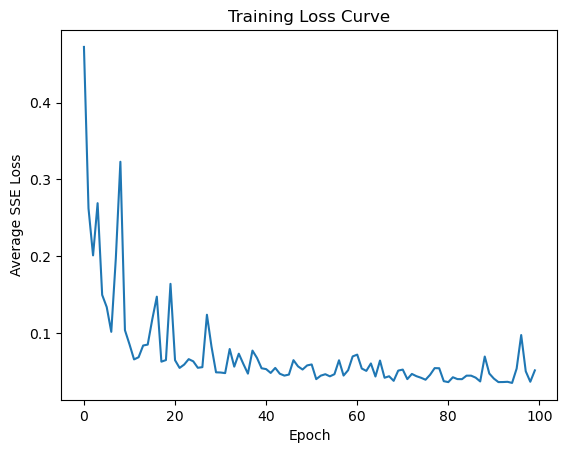

In [652]:
import torch.optim as optim

# Set up optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)
num_epochs = 100
train_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set to training mode
    total_loss = 0
    for features, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(features) 
        # Create one-hot encoded labels
        one_hot = torch.zeros_like(outputs).scatter_(1, labels.unsqueeze(1), 1)
        loss = torch.sum((outputs - one_hot) ** 2)  # SSE loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    avg_loss = total_loss / len(X_train)
    train_losses.append(avg_loss)
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Avg SSE Loss: {avg_loss:.4f}")

# Plot training loss curve
plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("Average SSE Loss")
plt.title("Training Loss Curve")
plt.show()

## Step 6: Evaluate Test Loss and Accuracy

Now, let’s evaluate the trained model on the test set to see how well it generalizes!

In [653]:
# Set to evaluation mode
model.eval()
total_test_loss = 0
correct = 0

# Evaluation loop
with torch.no_grad():
    for features, labels in test_loader:
        outputs = model(features)
        one_hot = torch.zeros_like(outputs).scatter_(1, labels.unsqueeze(1), 1)
        loss = torch.sum((outputs - one_hot) ** 2)
        total_test_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()

# Calculate metrics
avg_test_loss = total_test_loss / len(X_test)
accuracy = correct / len(X_test)
print(f"Average SSE Test Loss: {avg_test_loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Average SSE Test Loss: 0.0441
Test Accuracy: 0.9667
